<a href="https://colab.research.google.com/github/aryanriyanto/ANN_Prediksi_Banjir_Di_Kabupaten_Bandung/blob/main/ANN_Prediksi_Banjir_Di_Kabupaten_Bandung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## بِسْــــــــــــــــــمِ اللهِ الرَّحْمَنِ الرَّحِيْمِ

# **Prediksi Banjir di Kabupaten Bandung, Jawa Barat**
## ANN_Prediksi_Banjir_Di_Kabupaten_Bandung

#Eksplorasi Data (EDA)

* Distribusi Lokasi: Mengetahui jumlah kejadian banjir di tiap kecamatan atau desa yang tercatat.
* Analisis Curah Hujan: Mengetahui distribusi data curah hujan untuk melihat hubungan potensial antara curah hujan dan kejadian banjir.
* Hubungan Geografis: Menganalisis hubungan lokasi (latitude dan longitude) dengan kejadian banjir.
* Korelasi Fitur: Mencari korelasi antara fitur seperti curah_hujan, penggunaan lahan, dan jenis tanah.
* Kategori Curah Hujan: Menganalisis distribusi kategori curah hujan untuk melihat apakah ada hubungan antara kategori tertentu dan kejadian banjir.

#Preprocessing Data


* Pembersihan Kolom Lokasi: Mengubah lokasi sesuai format yang diinginkan.
* Penanganan Nilai Kosong: Mengisi atau menghapus nilai yang hilang.
* Encoding Data Kategorikal: Mengubah data kategori menjadi numerik jika diperlukan.
* Normalisasi/Penskalaan Data: Menyesuaikan skala data numerik.
* Menghapus Duplikasi: Memastikan tidak ada duplikasi data dalam dataset.



###import Library dan baca data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###baca data

In [ ]:
df= pd.read_csv("/content/Dataset_Banjir_Lengkap_Final.csv")
df.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5,3,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5,3,1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5,3,1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3,3,1
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lokasi                681 non-null    object 
 1   latitude              681 non-null    object 
 2   longitude             681 non-null    object 
 3   curah_hujan           681 non-null    float64
 4   penggunaan lahan      681 non-null    int64  
 5   jenis tanah           681 non-null    int64  
 6   Kategori Curah Hujan  681 non-null    int64  
 7   Labeling              681 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 42.7+ KB


In [ ]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Check the shape of the dataset after removing duplicates
df.shape
#remove missing values
df.isnull().sum()

,0
lokasi,0
latitude,0
longitude,0
curah_hujan,0
penggunaan lahan,0
jenis tanah,0
Kategori Curah Hujan,0
Labeling,0


In [ ]:
df = df.drop(['Kategori Curah Hujan', 'Labeling'], axis=1)
df.head(5)

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3


###Meengubah Nama Atribut

In [ ]:
df = df.rename(columns={"penggunaan lahan": "Penggunaan_Lahan", "jenis tanah": "Jenis_Tanah", "Kategori Curah Hujan": "Kategori_Curah_Hujan"})
df.head(5)

,lokasi,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3


### **Kategori Curah Hujan**

In [ ]:
def categorize_rainfall(curah_hujan):
  try:

    curah_hujan = int(curah_hujan)
  except ValueError:

    return None

  if curah_hujan < 1500:
    return 1
  elif 1500 <= curah_hujan <= 2000:
    return 2
  elif 2001 <= curah_hujan <= 2500:
    return 3
  elif 2501 <= curah_hujan <= 3000:
    return 4
  elif curah_hujan > 3000:
    return 5
  else:
    return None

df['curah_hujan'] = pd.to_numeric(df['curah_hujan'], errors='coerce')

df['Kategori_Curah_Hujan'] = df['curah_hujan'].apply(categorize_rainfall)
df

,lokasi,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,3
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,3
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,3
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,3
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,3
...,...,...,...,...,...,...,...
619,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,3
620,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,1
675,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,1
676,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,2


###Penggabungan Data Lokasi Kejadian

In [ ]:
# Define lists for prefixes that need to be replaced with commas in 'lokasi'
prefixes_kecamatan = ['Kec.', 'Kec', 'kec.', 'kec', 'KEC.', 'KEC', 'kecamatan', 'Kecamatan', 'KECAMATAN']
prefixes_desa = ['Des.', 'Des', 'des.', 'des', 'Desa.', 'Desa', 'Ds.', 'Ds', 'Kel.', 'Kel', 'kel.', 'kel', 'KEL.', 'KEL']

# Function to clean and format 'lokasi' column
def clean_location(location):
    location = str(location).strip()

    # Add standard prefix if not present
    if not location.startswith("JAWA BARAT, KABUPATEN BANDUNG,"):
        location = "JAWA BARAT, KABUPATEN BANDUNG, " + location

    # Replace prefixes with commas
    for prefix in prefixes_kecamatan + prefixes_desa:
        location = location.replace(prefix, ',')

    # Split location by commas, remove duplicates, and remove empty strings
    parts = [part.strip() for part in location.split(',') if part.strip()]
    unique_parts = []
    for part in parts:
        if part not in unique_parts:
            unique_parts.append(part)

    # Join the unique parts with commas, convert to uppercase, and return
    return ', '.join(unique_parts).upper()

# Apply cleaning function to 'lokasi' column
df['lokasi'] = df['lokasi'].apply(clean_location)

###menghitung jumlah banjir

In [ ]:
# Menghitung frekuensi kejadian banjir per wilayah geografis
banjir_per_area = df.groupby(['longitude', 'latitude']).size().reset_index(name='jumlah_banjir')

# Menampilkan beberapa data frekuensi
banjir_per_area

,longitude,latitude,jumlah_banjir
0,1.074.652,-7.089.728,1
1,1.075.365,-7.013.232,1
2,1.076.437,-6.993.945,1
3,1.078.934,-7.022.122,2
4,10.744.017,-7.120.492,1
...,...,...,...
226,107.870.048,-7.026.543,2
227,107.875.985,-7.009.957,2
228,107.887.255,-6.970.147,1
229,107.891.743,-7.034.742,1


In [ ]:
total_banjir = merged_df['jumlah_banjir'].sum()

# Print the total
print(f"Total jumlah banjir: {total_banjir}")

Total jumlah banjir: 446


###menggabungkan atribut jumlah_banjir pada data

In [ ]:
merged_df = pd.merge(df, banjir_per_area, on=['longitude', 'latitude'], how='left')
merged_df

,lokasi,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan,jumlah_banjir
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,3,1
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,3,1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,3,1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,3,1
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,3,2
...,...,...,...,...,...,...,...,...
257,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,3,1
258,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,1,1
259,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,1,2
260,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,2,2


###top 10 lokasi bencana banjir tertinggi

<ipython-input-67-ad0966e2bad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Blues_d")


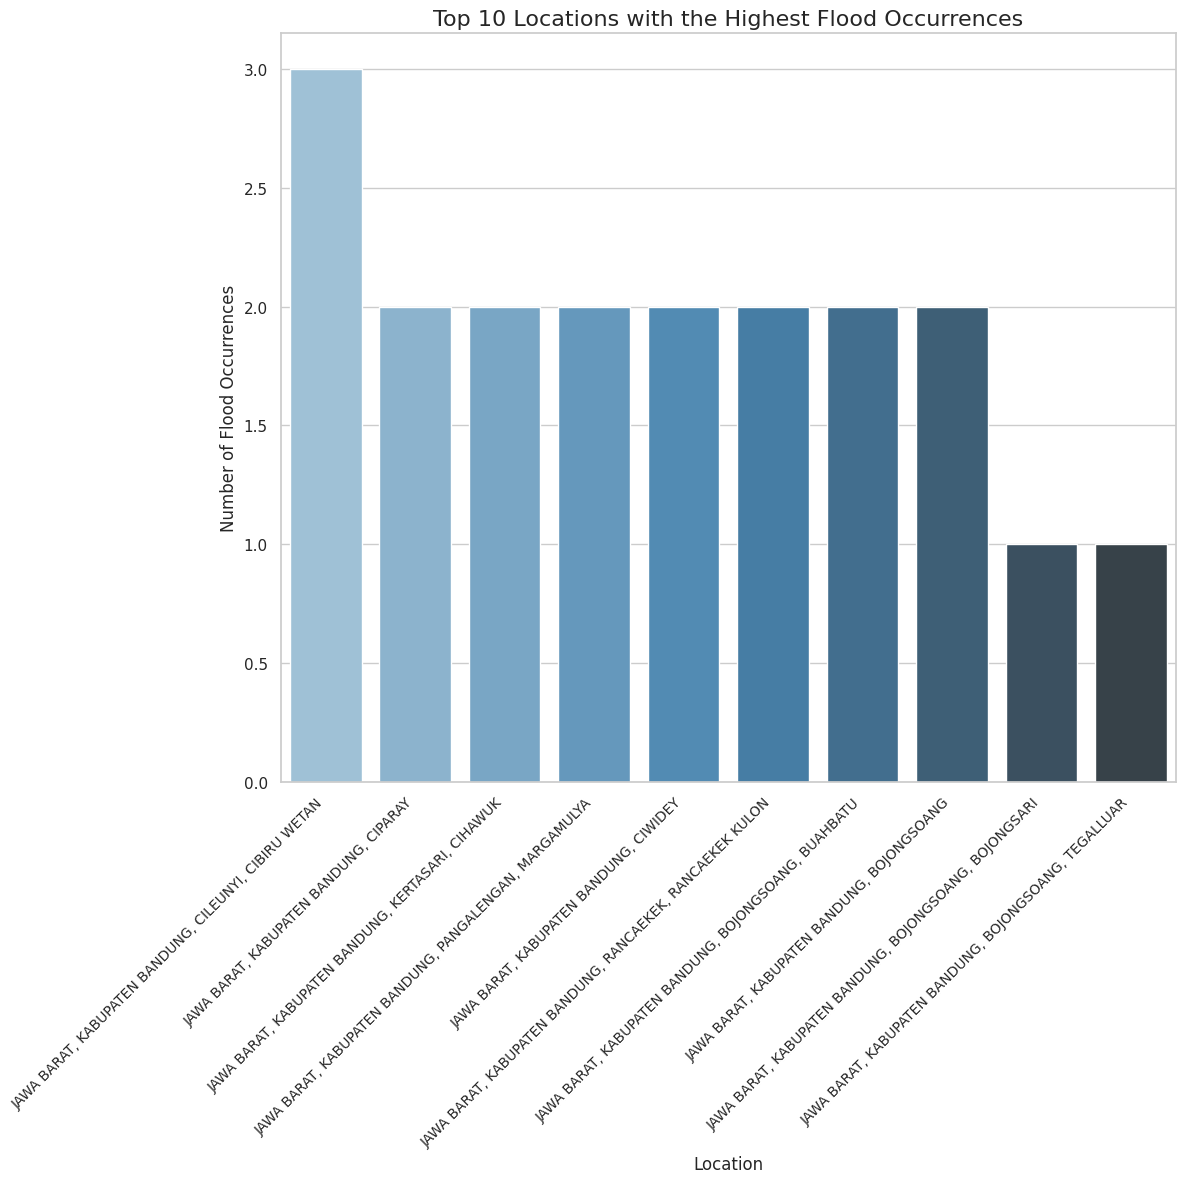

In [ ]:
top_10_locations = merged_df['lokasi'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Blues_d")
plt.title('Top 10 Locations with the Highest Flood Occurrences', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Flood Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### cek missing values

In [ ]:
merged_df.isnull().sum()

,0
lokasi,0
latitude,0
longitude,0
curah_hujan,0
Penggunaan_Lahan,0
Jenis_Tanah,0
Kategori_Curah_Hujan,0
jumlah_banjir,0


## **Labeling Data Banjir**
dengan ketentuan

*   1 = Rawan
*   0 = Tidak Rawan




In [ ]:
def labeling_banjir(row):
    if row['Penggunaan_Lahan'] >= 4 and row['Jenis_Tanah'] >= 4 and row['Kategori_Curah_Hujan'] >= 3 and row['jumlah_banjir'] >= 1:
        return 1
    else:
        return 0

merged_df['Labeling'] = merged_df.apply(labeling_banjir, axis=1)
merged_df

,lokasi,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan,jumlah_banjir,Labeling
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,3,1,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,3,1,1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,3,1,1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,3,1,0
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,3,2,0
...,...,...,...,...,...,...,...,...,...
257,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,3,1,1
258,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,1,1,0
259,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,1,2,0
260,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,2,2,0


In [ ]:
merged_df['Labeling'].value_counts()

,count
Labeling,
0,141
1,121


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lokasi                262 non-null    object 
 1   latitude              262 non-null    object 
 2   longitude             262 non-null    object 
 3   curah_hujan           262 non-null    float64
 4   Penggunaan_Lahan      262 non-null    int64  
 5   Jenis_Tanah           262 non-null    int64  
 6   Kategori_Curah_Hujan  262 non-null    int64  
 7   jumlah_banjir         262 non-null    int64  
 8   Labeling              262 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 18.5+ KB


###membuat atribut untuk keterangan tiap atribut

In [ ]:
tanah_mapping = {
    1: 'Regosol',
    2: 'Litosol',
    3: 'Andosol',
    4: 'Grumusol',
    5: 'Latosol',
    6: 'Aluvial',
    7: 'Podsolik',
    8: 'Clay'
}

# Menggunakan map untuk transformasi kolom
merged_df['Ket_Jenis_Tanah'] = merged_df['Jenis_Tanah'].map(tanah_mapping)

In [ ]:
lahan_mapping = {
    1: 'Perkebunan/Kebun',
    2: 'Hutan',
    3: 'Badan Air',
    4: 'Semak Belukar',
    5: 'Tegalan/Ladang',
    6: 'Sawah',
    7: 'Sawah Tadah Hujan',
    8: 'Gedung/Bangunan',
    9: 'Permukiman'
}

# Menggunakan map untuk transformasi kolom
merged_df['Ket_Penggunaan_Lahan'] = merged_df['Penggunaan_Lahan'].map(lahan_mapping)

##Normalisasi

In [ ]:
# Check for duplicate rows based on all columns
duplicates = merged_df.duplicated().sum()

# Normalizing 'curah_hujan', 'penggunaan lahan', 'jenis tanah', 'Kategori Curah Hujan', and 'Labeling'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_df[[ 'Penggunaan_Lahan', 'Jenis_Tanah', 'Kategori_Curah_Hujan', 'Labeling','jumlah_banjir']] = scaler.fit_transform(
    merged_df[['Penggunaan_Lahan', 'Jenis_Tanah', 'Kategori_Curah_Hujan', 'Labeling','jumlah_banjir']])

# Display result of normalization and check duplicates
merged_df, duplicates

(                                                lokasi    latitude  \
 0    JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...  -7.049.881   
 1    JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...  -7.065.081   
 2    JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...  -7.079.423   
 3    JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...  -7.127.131   
 4    JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...  -7.130.081   
 ..                                                 ...         ...   
 257  JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR  -7.028.698   
 258           JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG  -6.979.043   
 259  JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...  -7.009.957   
 260  JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...  -6.981.591   
 261  JAWA BARAT, KABUPATEN BANDUNG, MAJALAYA, BOJON...  -7.026.543   
 
        longitude  curah_hujan  Penggunaan_Lahan  Jenis_Tanah  \
 0    107.521.854     2272.940             0.000     0.571429   
 1    107.518.93

Normalisasi Data Numerik: Kolom numerik curah_hujan, penggunaan lahan, jenis tanah, Kategori Curah Hujan, dan Labeling telah dinormalisasi dengan rentang 0 hingga 1 menggunakan MinMaxScaler.

In [ ]:
merged_df

,lokasi,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan,jumlah_banjir,Labeling,Ket_Jenis_Tanah,Ket_Penggunaan_Lahan
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,0.000,0.571429,0.50,0.000000,0.0,Latosol,Perkebunan/Kebun
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,0.500,0.571429,0.50,0.000000,1.0,Latosol,Tegalan/Ladang
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,0.500,0.571429,0.50,0.000000,1.0,Latosol,Tegalan/Ladang
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,0.750,0.285714,0.50,0.000000,0.0,Andosol,Sawah Tadah Hujan
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,0.500,0.285714,0.50,0.090909,0.0,Andosol,Tegalan/Ladang
...,...,...,...,...,...,...,...,...,...,...,...
257,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,0.625,0.714286,0.50,0.000000,1.0,Aluvial,Sawah
258,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,0.625,0.714286,0.00,0.000000,0.0,Aluvial,Sawah
259,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,0.750,0.571429,0.00,0.090909,0.0,Latosol,Sawah Tadah Hujan
260,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,0.625,0.571429,0.25,0.090909,0.0,Latosol,Sawah


###Distribusi

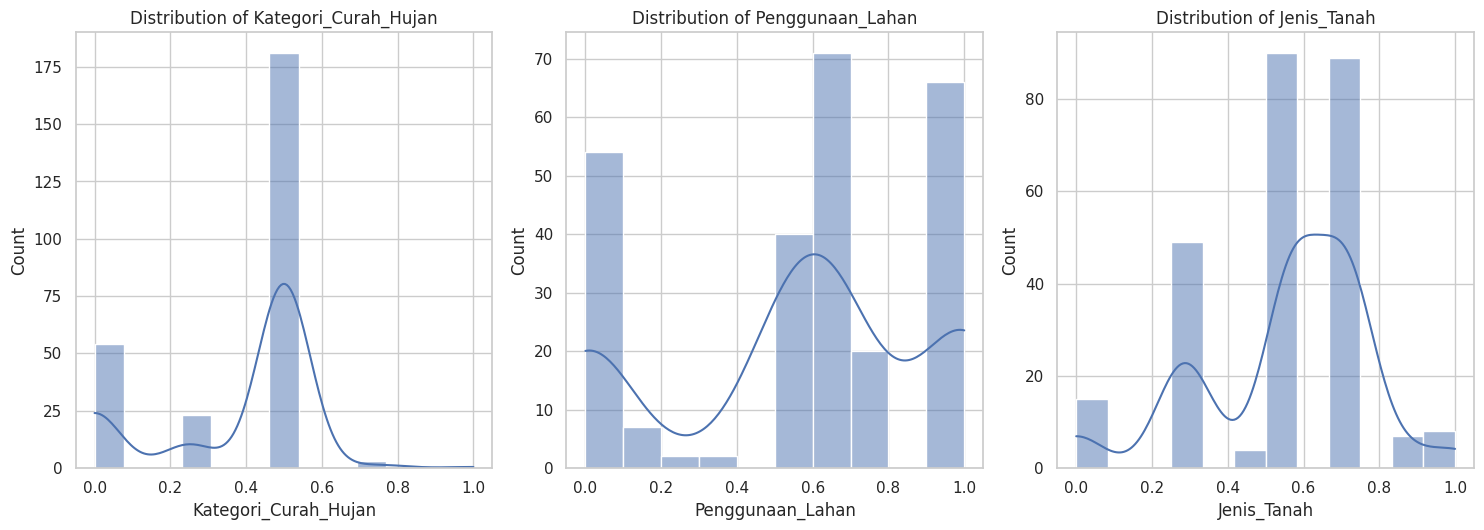

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Histograms to visualize the distribution of numerical features
numerical_columns = ['Kategori_Curah_Hujan', 'Penggunaan_Lahan', 'Jenis_Tanah']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

###pengecekan data outlier

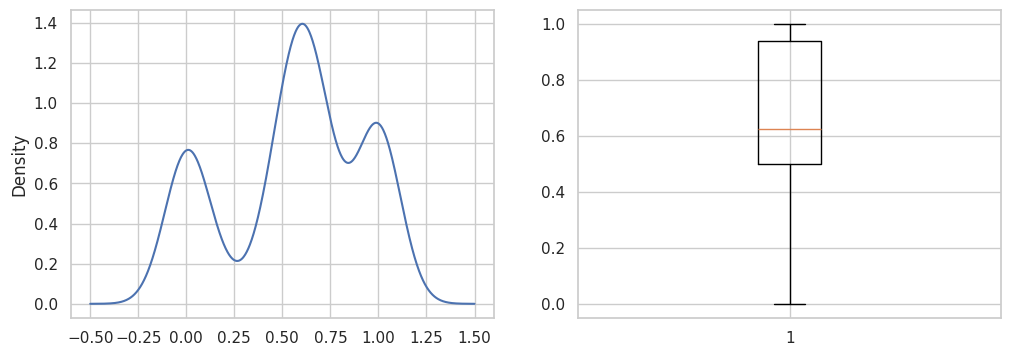

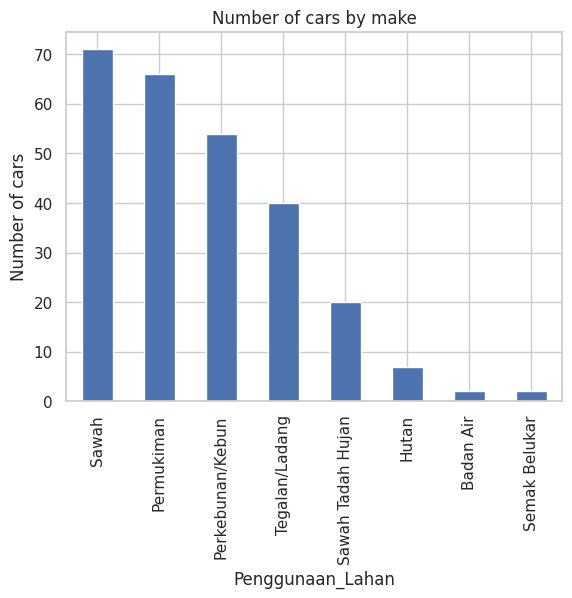

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
merged_df['Penggunaan_Lahan'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(merged_df['Penggunaan_Lahan'])
plt.show()

merged_df.Ket_Penggunaan_Lahan.value_counts().nlargest(40).plot(kind='bar')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Penggunaan_Lahan');

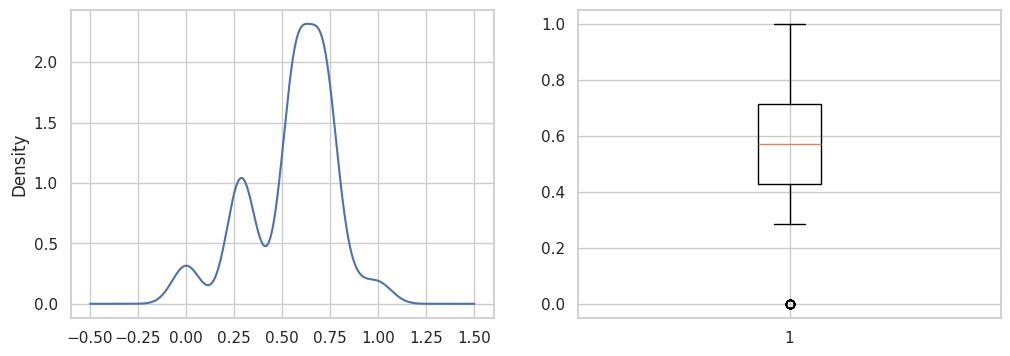

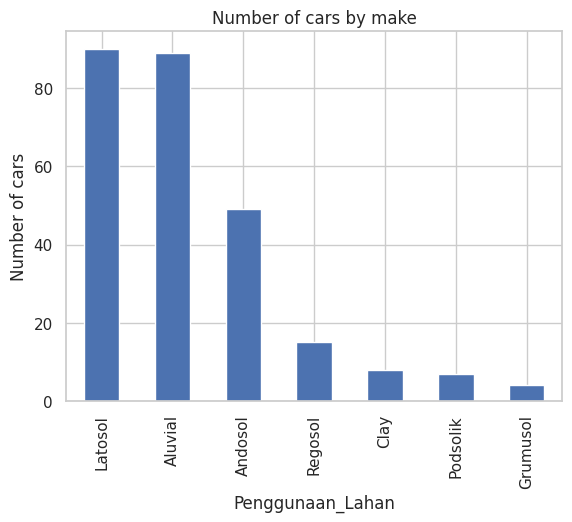

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
merged_df['Jenis_Tanah'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(merged_df['Jenis_Tanah'])
plt.show()

merged_df.Ket_Jenis_Tanah.value_counts().nlargest(40).plot(kind='bar')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Penggunaan_Lahan');

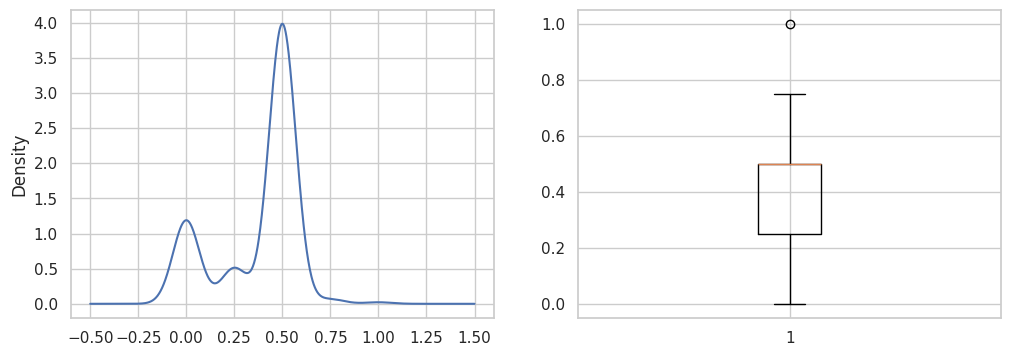

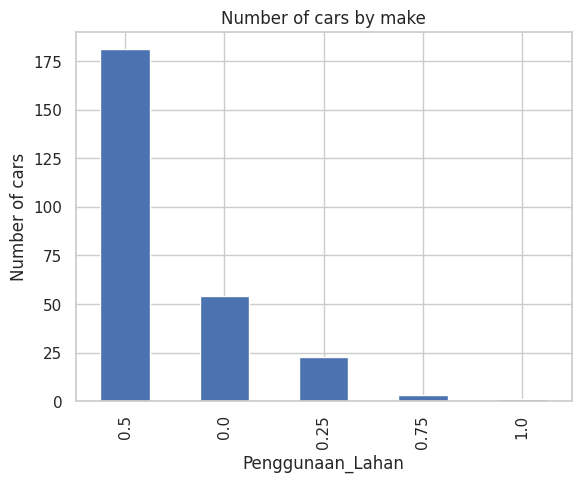

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
merged_df['Kategori_Curah_Hujan'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(merged_df['Kategori_Curah_Hujan'])
plt.show()

merged_df.Kategori_Curah_Hujan.value_counts().nlargest(40).plot(kind='bar')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Penggunaan_Lahan');

In [ ]:
merged_df.columns

Index(['lokasi', 'latitude', 'longitude', 'curah_hujan', 'Penggunaan_Lahan',
       'Jenis_Tanah', 'Kategori_Curah_Hujan', 'jumlah_banjir', 'Labeling',
       'Ket_Jenis_Tanah', 'Ket_Penggunaan_Lahan'],
      dtype='object')

###Correlation Matrix

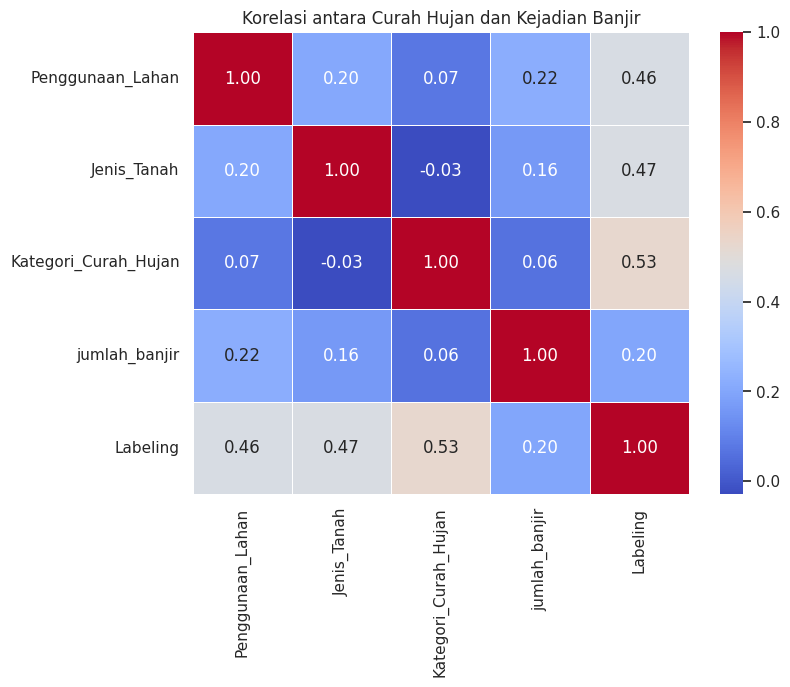

In [ ]:
# Menghitung korelasi Pearson untuk variabel numerik
correlation_matrix = merged_df[['Penggunaan_Lahan','Jenis_Tanah', 'Kategori_Curah_Hujan', 'jumlah_banjir', 'Labeling']].corr()

# Visualisasi Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Curah Hujan dan Kejadian Banjir')
plt.show()

# **Pemodelan Artificial Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout

X = merged_df[['Penggunaan_Lahan','Jenis_Tanah', 'Kategori_Curah_Hujan']]  # Parameter
y = merged_df['Labeling']  # target

# Normalisasi data fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Membangun model Artificial Neural Network
model_ann = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Layer pertama dengan 64 neuron
    Dense(32, activation='relu'),  # Layer kedua dengan 32 neuron
    Dense(16, activation='relu'),  # Layer ketiga dengan 16 neuron
    Dense(1, activation='sigmoid')  # Output layer dengan sigmoid (untuk prediksi biner)
])

# Kompilasi model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pelatihan model
history = model_ann.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluasi model pada data uji
loss, accuracy = model_ann.evaluate(X_test, y_test)
print(f"Loss pada data uji: {loss:.4f}")
print(f"Akurasinya pada data uji: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4409 - loss: 0.6897 - val_accuracy: 0.9524 - val_loss: 0.6038
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9344 - loss: 0.6115 - val_accuracy: 1.0000 - val_loss: 0.5280
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9957 - loss: 0.5328 - val_accuracy: 1.0000 - val_loss: 0.4428
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9979 - loss: 0.4466 - val_accuracy: 1.0000 - val_loss: 0.3448
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9916 - loss: 0.3529 - val_accuracy: 1.0000 - val_loss: 0.2522
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9888 - loss: 0.2649 - val_accuracy: 1.0000 - val_loss: 0.1767
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.1783 - val_accuracy: 1.0000 - val_loss: 0.1222
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1340 - val_accuracy: 1.0000 - val_los

## Prediksi dengan Model ANN

In [ ]:
# Melakukan prediksi pada keseluruhan data uji (X_test) dan menampilkan hasil prediksi biner dan probabilitas
y_pred_full = model_ann.predict(X_test)

# Mengonversi probabilitas menjadi label biner (0 atau 1)
y_pred_binary_full = (y_pred_full > 0.5).astype(int)


# Menggabungkan data asli dengan prediksi
prediksi_df = pd.DataFrame({
    'Prediksi (Biner)': y_pred_binary_full.flatten(),
    'Prediksi (Probabilitas)': y_pred_full.flatten(),
    'Label Asli': y_test.values
})

prediksi_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


,Prediksi (Biner),Prediksi (Probabilitas),Label Asli
0,0,4.214578e-04,0.0
1,1,5.229663e-01,0.0
2,1,9.999991e-01,1.0
3,1,5.229663e-01,0.0
4,1,9.999148e-01,1.0
5,0,4.699422e-04,0.0
6,1,9.997585e-01,1.0
7,0,6.946224e-04,0.0
8,1,9.999999e-01,0.0
9,1,9.995013e-01,1.0


## Evaluasi Model Neural Network

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Akurasi: 0.9434
Precision: 0.8750
Recall: 1.0000
F1-Score: 0.9333
AUC: 0.9658
Fall-out: 0.0938

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        32
         1.0       0.88      1.00      0.93        21

    accuracy                           0.94        53
   macro avg       0.94      0.95      0.94        53
weighted avg       0.95      0.94      0.94        53



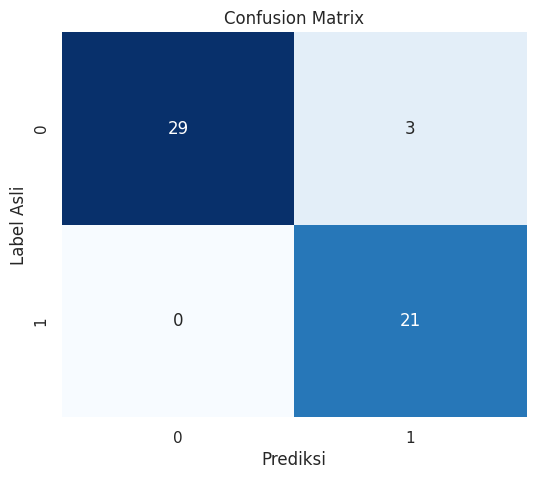

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

#predict label
y_pred_full = model_ann.predict(X_test)
y_pred_binary_full = (y_pred_full > 0.5).astype(int)
# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary_full)
TN, FP, FN, TP = cm.ravel()
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_binary_full)
precision = precision_score(y_test, y_pred_binary_full)
recall = recall_score(y_test, y_pred_binary_full)
f1 = f1_score(y_test, y_pred_binary_full)
auc = roc_auc_score(y_test, y_pred_full)
fall_out = FP / (FP + TN) if (FP + TN) != 0 else 0

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Fall-out: {fall_out:.4f}")

# Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_binary_full))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix')
plt.show()


[TN, FP
FN, TP]

___
Rumus

* precision = TP/TP+FP
* recall = TP/TP+FN
* F1-Score = 2 * precision * recall / precision + recall

###menggabungkan hasil prediksi dengan datanya

In [ ]:
# Gabungkan data X_test dan prediksi_df
gabungan_df = pd.concat([pd.DataFrame(X_test, columns=X.columns), prediksi_df.reset_index(drop=True)], axis=1)
gabungan_df

,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan,Prediksi (Biner),Prediksi (Probabilitas),Label Asli
0,0.176207,0.734346,-0.617061,0,4.214578e-04,0.0
1,-0.889166,0.734346,0.571689,1,5.229663e-01,0.0
2,1.241580,2.029959,0.571689,1,9.999991e-01,1.0
3,-0.889166,0.734346,0.571689,1,5.229663e-01,0.0
4,1.241580,0.086539,0.571689,1,9.999148e-01,1.0
5,-1.599415,0.086539,0.571689,0,4.699422e-04,0.0
6,0.176207,0.734346,0.571689,1,9.997585e-01,1.0
7,0.176207,0.086539,-0.617061,0,6.946224e-04,0.0
8,-1.599415,1.382153,2.949188,1,9.999999e-01,0.0
9,0.531331,0.086539,0.571689,1,9.995013e-01,1.0


###Loss Curve

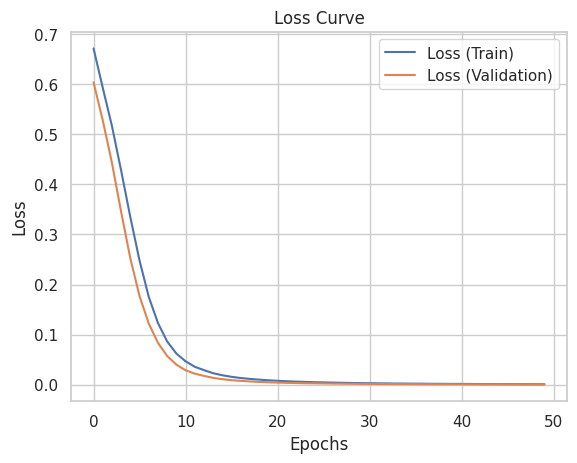

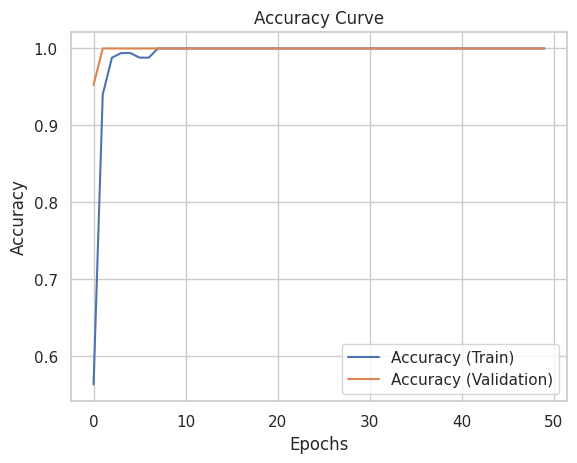

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Visualisasi ROC Curve



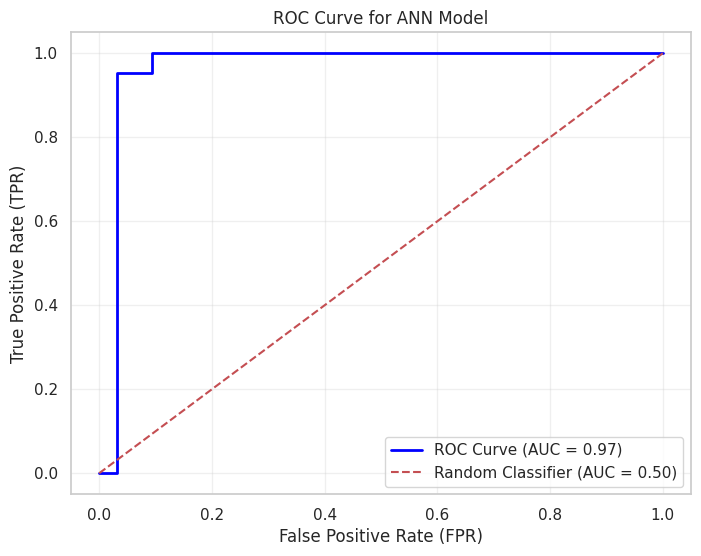

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Ambil probabilitas prediksi dan label asli
y_pred_prob = gabungan_df['Prediksi (Probabilitas)']
y_test_actual = gabungan_df['Label Asli']

# Menghitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test_actual, y_pred_prob)
auc_score = roc_auc_score(y_test_actual, y_pred_prob)

# Visualisasi ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier (AUC = 0.50)")  # Garis random
plt.title("ROC Curve for ANN Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


###Feature Importance

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━

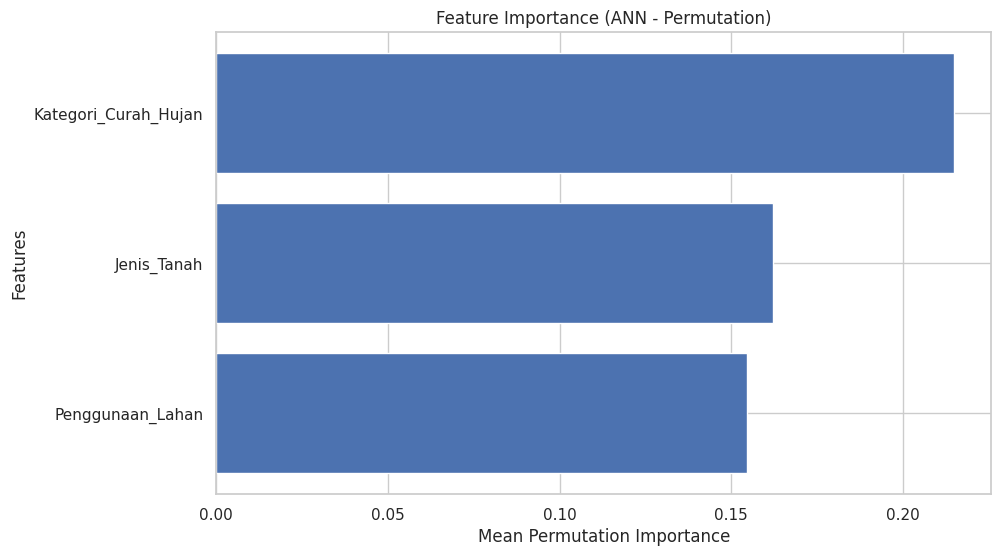

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin

# Bungkus model ANN agar kompatibel dengan sklearn
class ANNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = np.array([0, 1])  # Kelas target

    def fit(self, X, y):
        # Tidak ada proses fitting karena model sudah dilatih
        pass

    def predict(self, X):
        # Prediksi kelas (0 atau 1)
        return (self.model.predict(X) > 0.5).astype(int).flatten()

# Bungkus model ANN
wrapped_ann = ANNWrapper(model_ann)

# Hitung Permutation Importance
perm_importance = permutation_importance(
    wrapped_ann,   # Model ANN yang dibungkus
    X_test,        # Data uji (fitur)
    y_test,        # Data uji (label)
    scoring="accuracy",
    n_repeats=10,
    random_state=42
)

# Ambil hasil imporasi
sorted_idx = perm_importance.importances_mean.argsort()

# Visualisasikan feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Mean Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance (ANN - Permutation)")
plt.show()

## Menyimpan Model

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(model_ann, 'model_flood_prediction.pkl')
print("Model berhasil disimpan sebagai 'model_flood_prediction.pkl'")


Model berhasil disimpan sebagai 'model_flood_prediction.pkl'


## Menggunakan Model yang telah disimpan

In [ ]:
# Load model
model_ann = joblib.load('model_flood_prediction.pkl')
print("Model berhasil dimuat")

Model berhasil dimuat


###memasukan data

In [ ]:
import pandas as pd
import joblib

# Path file data baru dan model tersimpan
data_baru = pd.read_csv ('/content/data_baru_banjir_prediksi.csv')
model_path = '/content/model_flood_prediction.pkl'

In [ ]:
model_path

'/content/model_flood_prediction.pkl'

## Prediksi Data baru

In [ ]:
# Memuat model yang sudah disimpan
model_ann = joblib.load(model_path)

# Menyiapkan data fitur (X) untuk prediksi
X_baru = data_baru[['Kategori_Curah_Hujan', 'Penggunaan_Lahan', 'Jenis_Tanah']]

# Melakukan prediksi
prediksi = model_ann.predict(X_baru)

# Menambahkan hasil prediksi ke dataframe
data_baru['Prediksi'] = prediksi
data_baru

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan,Ket_Jenis_Tanah,Ket_Penggunaan_Lahan,Prediksi
0,-7.193613,107.480235,2122.59,0.125,0.857143,0.333333,Podsolik,Hutan,0.999785
1,-7.200886,107.393663,2892.42,0.000,0.285714,0.666667,Andosol,Perkebunan/Kebun,0.996954
2,-7.144969,107.372248,3113.85,0.000,0.857143,1.000000,Podsolik,Perkebunan/Kebun,0.999944
3,-7.152107,107.343694,3100.48,0.000,0.857143,1.000000,Podsolik,Perkebunan/Kebun,0.999944
4,-7.167574,107.324658,3025.60,0.000,0.857143,1.000000,Podsolik,Perkebunan/Kebun,0.999944
...,...,...,...,...,...,...,...,...,...
1018,-7.047656,107.826504,2019.89,0.500,0.285714,0.333333,Andosol,Tegalan/Ladang,0.998864
1019,-6.840260,107.703400,2134.19,0.000,0.285714,0.333333,Andosol,Perkebunan/Kebun,0.994814
1020,-6.842104,107.680401,2138.27,0.000,0.285714,0.333333,Andosol,Perkebunan/Kebun,0.994814
1021,-6.832021,107.729653,2125.14,0.000,0.285714,0.333333,Andosol,Perkebunan/Kebun,0.994814


In [ ]:
# Menambahkan kolom 'prediksi_normal' dengan nilai 1 atau 0 berdasarkan prediksi
data_baru['prediksi_normal'] = data_baru['Prediksi'].apply(lambda x: 1 if x > 0.999 else 0)

# Menampilkan hasil dengan kolom baru
data_baru

,latitude,longitude,curah_hujan,Penggunaan_Lahan,Jenis_Tanah,Kategori_Curah_Hujan,Ket_Jenis_Tanah,Ket_Penggunaan_Lahan,Prediksi,prediksi_normal
0,-7.193613,107.480235,2122.59,0.125,0.857143,0.333333,Podsolik,Hutan,0.999785,1
1,-7.200886,107.393663,2892.42,0.000,0.285714,0.666667,Andosol,Perkebunan/Kebun,0.996954,0
2,-7.144969,107.372248,3113.85,0.000,0.857143,1.000000,Podsolik,Perkebunan/Kebun,0.999944,1
3,-7.152107,107.343694,3100.48,0.000,0.857143,1.000000,Podsolik,Perkebunan/Kebun,0.999944,1
4,-7.167574,107.324658,3025.60,0.000,0.857143,1.000000,Podsolik,Perkebunan/Kebun,0.999944,1
...,...,...,...,...,...,...,...,...,...,...
1018,-7.047656,107.826504,2019.89,0.500,0.285714,0.333333,Andosol,Tegalan/Ladang,0.998864,0
1019,-6.840260,107.703400,2134.19,0.000,0.285714,0.333333,Andosol,Perkebunan/Kebun,0.994814,0
1020,-6.842104,107.680401,2138.27,0.000,0.285714,0.333333,Andosol,Perkebunan/Kebun,0.994814,0
1021,-6.832021,107.729653,2125.14,0.000,0.285714,0.333333,Andosol,Perkebunan/Kebun,0.994814,0


In [ ]:
# Menghitung jumlah prediksi 1 dan 0
jumlah_prediksi_1 = (data_baru['prediksi_normal'] == 1).sum()
jumlah_prediksi_0 = (data_baru['prediksi_normal'] == 0).sum()

print(f"Jumlah prediksi 1: {jumlah_prediksi_1}")
print(f"Jumlah prediksi 0: {jumlah_prediksi_0}")

Jumlah prediksi 1: 522
Jumlah prediksi 0: 501


In [ ]:
#download data data_baru_cleaned

from google.colab import files
data_baru.to_csv('data_baru_prediksi_model.csv', encoding = 'utf-8-sig')
files.download('data_baru_prediksi_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>